# Importing depedencies

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DISHA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [19]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Loading dataset

In [7]:
resume = pd.read_csv('UpdatedResumeDataset.csv')

In [8]:
resume.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [9]:
resume.shape

(962, 2)

In [10]:
resume['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [11]:
resume['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

# Visualization

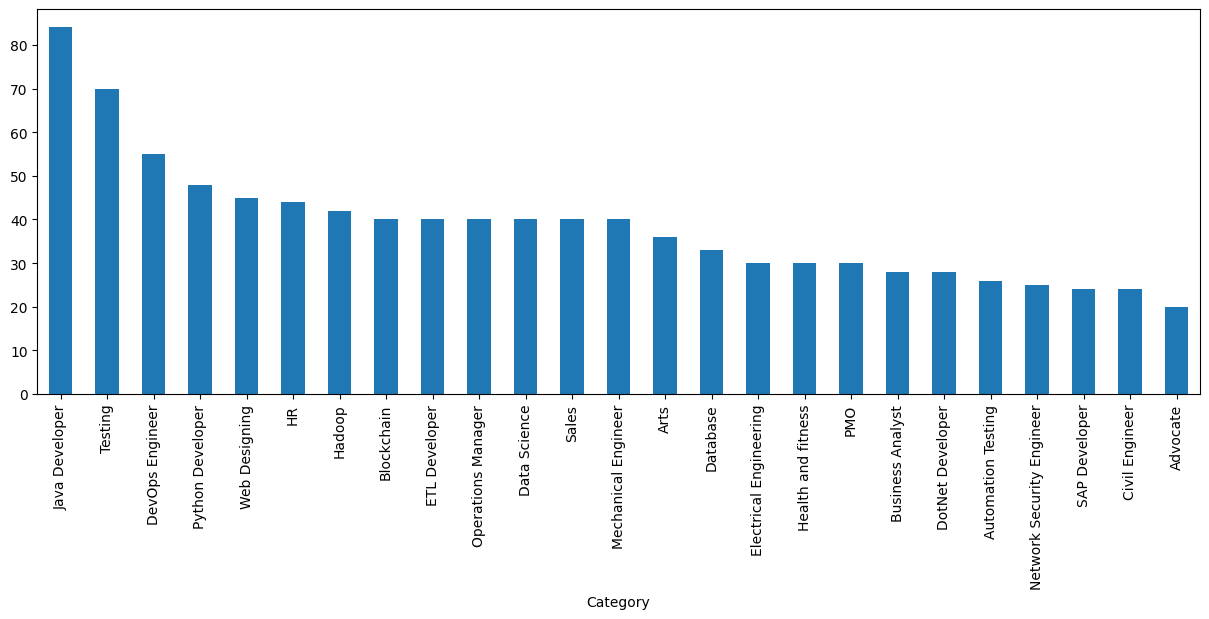

In [12]:
plt.figure(figsize=(15,5))
resume['Category'].value_counts().plot(kind='bar')
plt.show()

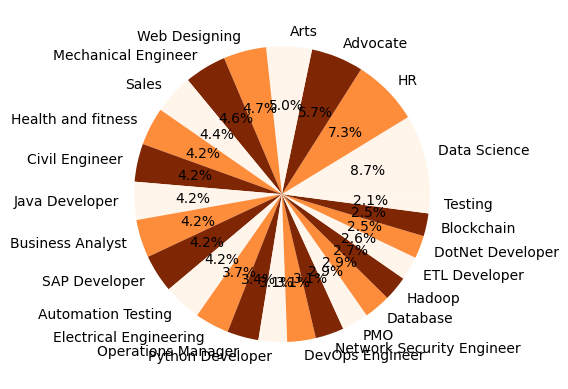

In [14]:
counts = resume['Category'].value_counts()
labels = resume['Category'].unique()
plt.pie(counts, labels = labels, autopct = '%.1f%%', colors=plt.cm.Oranges(np.linspace(0,1,3)))
plt.show()

# Text cleaning

In [26]:
def clean(text):
    url = re.compile(r'hrrps?://\S+|www\.S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-0+-]+\.[A-Za-z]{2,}\b')
    clean_text = url.sub('',text)
    clean_text = email_pattern.sub('', clean_text)
    clean_text = re.sub('[^\w\s]', '', clean_text)
    stop_words = set(stopwords.words('english'))
    clean_text = ' '.join(word for word in clean_text.split() if word.lower not in stop_words)

    return clean_text

<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\w'
C:\Users\DISHA\AppData\Local\Temp\ipykernel_22156\4121170729.py:6: SyntaxWarning: invalid escape sequence '\w'
  clean_text = re.sub('[^\w\s]', '', clean_text)


In [27]:
resume['Resume'] = resume['Resume'].apply(lambda x : clean(x))

In [28]:
resume['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the revi

# Encoding

In [29]:
le = LabelEncoder()
le.fit(resume[['Category']])
resume['Category'] = le.transform(resume['Category'])

C:\Users\DISHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
resume['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Vectorization

In [31]:
tfidf = TfidfVectorizer()
tfidf.fit(resume['Resume'])
resume_data = tfidf.transform(resume['Resume'])

# Splitting data into training and test data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(resume_data, resume['Category'], test_size=0.2, random_state=42)

In [35]:
X_test.shape

(193, 8153)

# Model

In [39]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9844559585492227


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [43]:
models = {
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression':LogisticRegression(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SVC':SVC(),
    'MultinomialNB':MultinomialNB(),
    'OneVSRestClassifier':OneVsOneClassifier(KNeighborsClassifier())
}

In [49]:
accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy

    print(f"Accuracy of {model_name} on test date: {accuracy}")

Accuracy of KNeighborsClassifier on test date: 0.9844559585492227
Accuracy of LogisticRegression on test date: 0.9948186528497409
Accuracy of RandomForestClassifier on test date: 0.9844559585492227
Accuracy of SVC on test date: 0.9948186528497409
Accuracy of MultinomialNB on test date: 0.917098445595855
Accuracy of OneVSRestClassifier on test date: 0.9844559585492227


In [50]:
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Prediction

In [58]:
myresume = """Technical Skills Web Technologies: Angular JS, HTML5, CSS3, SASS, Bootstrap, Jquery, Javascript. Software: Brackets, Visual Studio, Photoshop, Visual Studio Code Education Details 
January 2015 B.E CSE Nagpur, Maharashtra G.H.Raisoni College of Engineering
October 2009  Photography Competition Click Nagpur, Maharashtra Maharashtra State Board
    College Magazine OCEAN
Web Designer 

Web Designer - Trust Systems and Software
Skill Details 
PHOTOSHOP- Exprience - 28 months
BOOTSTRAP- Exprience - 6 months
HTML5- Exprience - 6 months
JAVASCRIPT- Exprience - 6 months
CSS3- Exprience - Less than 1 year months
Angular 4- Exprience - Less than 1 year monthsCompany Details 
company - Trust Systems and Software
description - Projects worked on:
1. TrustBank-CBS
Project Description: TrustBank-CBS is a core banking solution by Trust Systems.
Roles and Responsibility:
Ã¢Â—Â Renovated complete UI to make it more modern, user-friendly, maintainable and optimised for bank use.
Ã¢Â—Â Shared the UI structure and guidelines to be incorporated, with development team of around 50
members.
Ã¢Â—Â Achieved the target of project completion in given time frame.
Ã¢Â—Â Made required graphics for the project in photoshop

2. Loan Bazar (Loan Appraisal)
Project Description: Loan Bazar is a MVC-based application dedicated to creating and managing
loan applications. The goal of this application is to streamline the process of loan application and integrate with existing CBS.
Roles and Responsibility
Ã¢Â—Â Designed and developed modern and responsive UI of entire application and achieved the target in given time frame.
Ã¢Â—Â Made required graphics for the project in photoshop
3. Capital Security Bond Application
Project Description: Capital Security Bond Application is a MVC based application which provided an online platform to purchase gold bond
Roles and Responsibility:
Ã¢Â—Â Designed and developed modern and responsive UI of entire application and achieved the target in given time frame.
Ã¢Â—Â Made required graphics for the project in photoshop

4. SoftGST
Project Description: SoftGST (Web Based Application) is an ASP application to every tax
payers and its vendors for generating the GSTR returns on the basis of sales / purchase
data, additionally the application can do the reconciliation of GSTR 2 A with purchase register.
Roles and Responsibility:
Ã¢Â—Â Designed and developed the UI of Dashboard.

5. Trust Analytica:
Project Description: Trust Analytika is the mobile web app that shows bank asset, liability,
income, expenses.
Roles and Responsibility:
Ã¢Â—Â Designed and developed the landing page of the application.
Ã¢Â—Â Supported the developers in UI implementation

6. Website's:
Project Name:
1. TSR Technology Services - http://tsrtechnologyservices.com
2. Vidarbha Merchants Urban Co-Op Bank - http://vmcbank.com
3. GISSS - http://gisss.co.in
4. Softtrust USA - http://softtrustusa.com
Roles and Responsibility
Ã¢Â—Â Communicated with clients to understand their requirement
Ã¢Â—Â Made mocks for the website
Ã¢Â—Â Designed and developed complete website and hosted them in stipulated time.
company - www.jalloshband.com
description - Project Name:
1. Jallosh Band - www.jalloshband.com
2. An Endeavor Foundation
Roles and Responsibility:
Ã¢Â—Â Communicated with clients to understand their requirement
Ã¢Â—Â Made mocks for the website
Ã¢Â—Â Designed and developed complete website and hosted them in stipulated time.
company - 10MagicalFingers
description - National and international client interaction.
Ã¢Â—Â Management of digital data"""

In [59]:
cleaned_resume = clean(myresume)
input_data = tfidf.transform([cleaned_resume])
prediction_id = model.predict(input_data)[0]
category_map = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_map.get(prediction_id, "Unknown")

print(category_name)

Web Designing
